<a href="https://colab.research.google.com/github/dakshayani2906/Data-Science-Portfolio/blob/main/WHO_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Context**

DeltaSquare is an NGO that works with the government on matters of social policy to bring about a change in the lives of underprivileged sections of society. They are given a task of coming up with a policy framework using a dataset that the government received from WHO.



**Objective**

You, as a Data Scientist at DeltaSquare, are tasked with analyzing the data provided to identify the different factors that influence the income of an individual, build a prediction model that can help the government formulate policies for the right pockets of the society, and share a proposal for the government.



**Dataset**

The data contains characteristics of the people

age: continuous - age of a Person

workclass: Where does a person works - categorical - (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked, Unknown)

fnlwgt: continuous - Weight assigned by Current Population Survey (CPS) - People with similar demographic characteristics should have similar weights since it is a feature aimed to allocate similar weights to people with similar demographic characteristics.

education: Degree the person has - categorical - (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool)

education-num: no. of years a person studied - continuous.

marital-status: categorical - (Married, Never-married, Not-married)

occupation: categorical - (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces, Unknown)

race: categorical - (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)

sex: categorical - (Female, Male)

capital-gain: Investment gain of the person other than salary - continuous

capital-loss: Loss from investments - continuous

hours-per-week: No. of hours a person works - continuous.

native-contienent: categorical - (North America, Asia, Other, Europe, South America)

salary: >50K, <=50K (dependent variable, the salary is in Dollars per year)

In [97]:
# Warnings

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

#libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

#Library to split data
from sklearn.model_selection import train_test_split

#libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Removes the limit for number of displayed columns
pd.set_option("display.max_columns", None)

#Set the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

!pip install statsmodels

import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Corrected line
import statsmodels.api as sm
from statsmodels.tools import add_constant
from sklearn.linear_model import LogisticRegression


# TO get different metric scores
from sklearn.metrics import(
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
)

In [98]:
# Loding data
who = pd.read_csv("who_data.csv")

In [99]:
data = who.copy()

In [100]:
data.head()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_contienent,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,north_america,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,married,Exec-managerial,White,Male,0,0,13,north_america,<=50K
2,38,Private,215646,HS-grad,9,not_married,Handlers-cleaners,White,Male,0,0,40,north_america,<=50K
3,53,Private,234721,11th,7,married,Handlers-cleaners,Black,Male,0,0,40,north_america,<=50K
4,28,Private,338409,Bachelors,13,married,Prof-specialty,Black,Female,0,0,40,north_america,<=50K


In [101]:
data.tail()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_contienent,salary
32526,27,Private,257302,Assoc-acdm,12,married,Tech-support,White,Female,0,0,38,north_america,<=50K
32527,40,Private,154374,HS-grad,9,married,Machine-op-inspct,White,Male,0,0,40,north_america,>50K
32528,58,Private,151910,HS-grad,9,not_married,Adm-clerical,White,Female,0,0,40,north_america,<=50K
32529,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,White,Male,0,0,20,north_america,<=50K
32530,52,Self-emp-inc,287927,HS-grad,9,married,Exec-managerial,White,Female,15024,0,40,north_america,>50K


This data contains info about diffferent types of people

In [102]:
data.shape


(32531, 14)

The dataset has 32531 rows and 14 columns

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32531 entries, 0 to 32530
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32531 non-null  int64 
 1   workclass               32531 non-null  object
 2   fnlwgt                  32531 non-null  int64 
 3   education               32531 non-null  object
 4   education_no_of_years   32531 non-null  int64 
 5   marital_status          32531 non-null  object
 6   occupation              32531 non-null  object
 7   race                    32531 non-null  object
 8   sex                     32531 non-null  object
 9   capital_gain            32531 non-null  int64 
 10  capital_loss            32531 non-null  int64 
 11  working_hours_per_week  32531 non-null  int64 
 12  native_contienent       32531 non-null  object
 13  salary                  32531 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


Dependent variable is the salary which is of categorical type.

age, fnlwgt, education_no_of_years, capital gain, capital loss and working_hours_per_week are of integer type while other variables are of categorical type.

There are no missing values in the dataset.

In [104]:
data.duplicated().sum()

np.int64(0)

There are no duplicate values in the dataset.

In [105]:
# Check missing values

data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_no_of_years,0
marital_status,0
occupation,0
race,0
sex,0
capital_gain,0


There are no missing values in the dataset.

In [106]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32531.0,38.588362,13.637644,17.0,28.0,37.0,48.0,90.0
fnlwgt,32531.0,189788.230826,105564.168325,12285.0,117815.0,178370.0,237019.0,1484705.0
education_no_of_years,32531.0,10.081953,2.571842,1.0,9.0,10.0,12.0,16.0
capital_gain,32531.0,1078.642649,7388.624210,0.0,0.0,0.0,0.0,99999.0
capital_loss,32531.0,87.384341,403.137260,0.0,0.0,0.0,0.0,4356.0
working_hours_per_week,32531.0,40.441025,12.347506,1.0,40.0,40.0,45.0,99.0


age: Average age of people in the dataset is around 38 years, age has a wide range from 17 to 90 years.

education_no_of_years: The average number of years spent in education is ~10 years. There's a large difference between the minimum value and 25th percentile which indicates that there might be outliers present in this variable.

capital_gain: There's a huge difference in the 75th percentile and maximum value of capital_gain indicating the presence of outliers. Also, 75% of the observations are 0.

capital_loss: Same as capital gain there's a huge difference in the 75th percentile and maximum value indicating the presence of outliers. Also, 75% of the observations are 0.

working_hours_per_week: On average people work for 40 hours a week. A vast difference in minimum value and 25th percentile, as well as 75th percentile and the maximum value, indicates that there might be outliers present in the variable.

In [107]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [108]:
#function to create labeled barplots

def labeled_barplot(data, feature, perc = False, n = None):
  total = len(data[feature])
  count = data[feature].nunique()
  if n is None:
    plt.figure(figsize = (count + 2, 6))
  else:
    plt.figure(figsize= (n+2, 6))

  plt.xticks(rotation = 90, fontsize = 15)
  ax = sns.countplot(
      data =data,
      x = feature,
      palette = "Paired",
      order = data[feature].value_counts().index[:n],
  )

  for p in ax.patches:
    if perc == True:
      label = "{:.1f}%".format(
        100 * p.get_height() / total
      )
    else:
      label = p.get_height() / total

    x = p.get_x() + p.get_width() / 2
    y = p.get_height()

    ax.annotate(
        label,
        (x,y),
        ha = "center",
        va = "center",
        size = 12,
        xytext = (0,5),
        textcoords = "offset points",
    )
  plt.show()

In [109]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [110]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [111]:
df = data.copy()

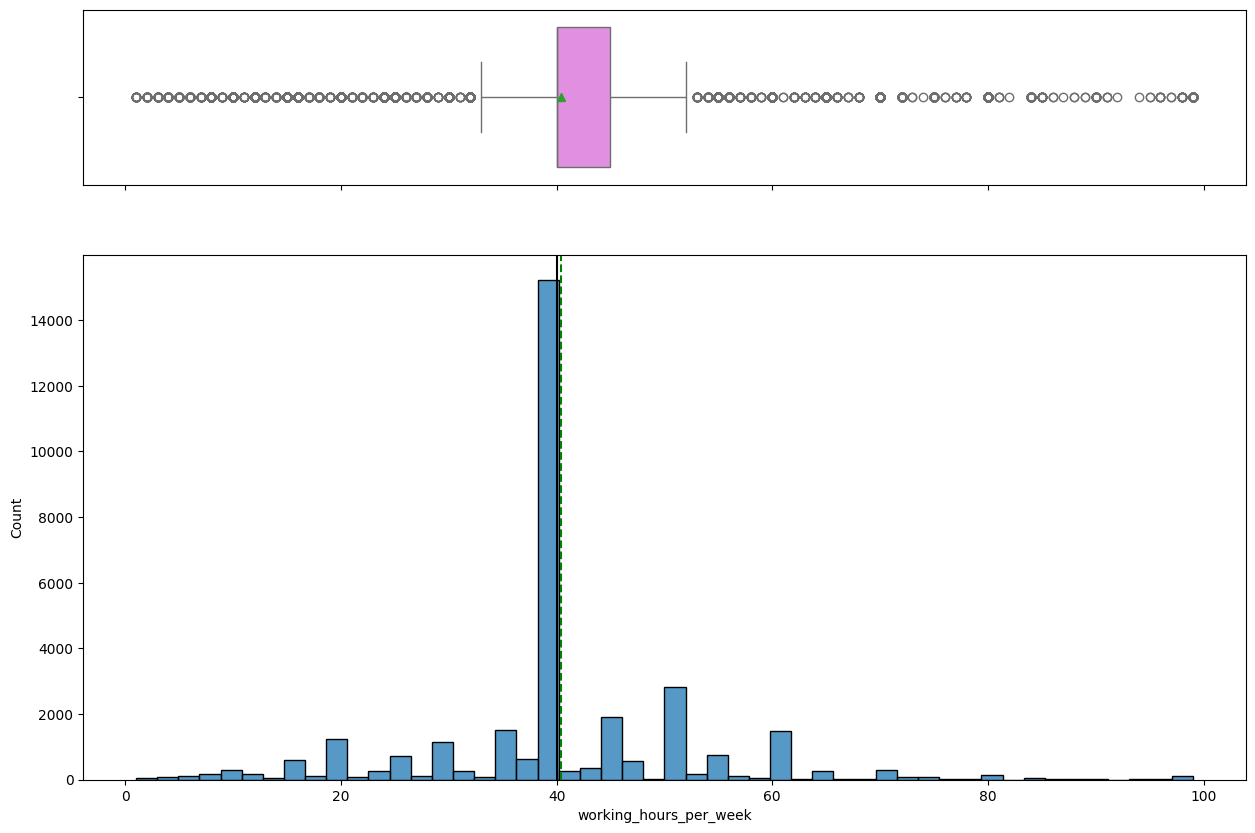

In [112]:
# Univariate analysis

# Observations on hours per week

histogram_boxplot(df, "working_hours_per_week", bins=50)

Most of the data is concentrated around 40 working hours this gives a sense that most of the observations in data might be salaried employees working 8hrs 5 days a week.

Some of the observations are clear outliers which needs to be treated.

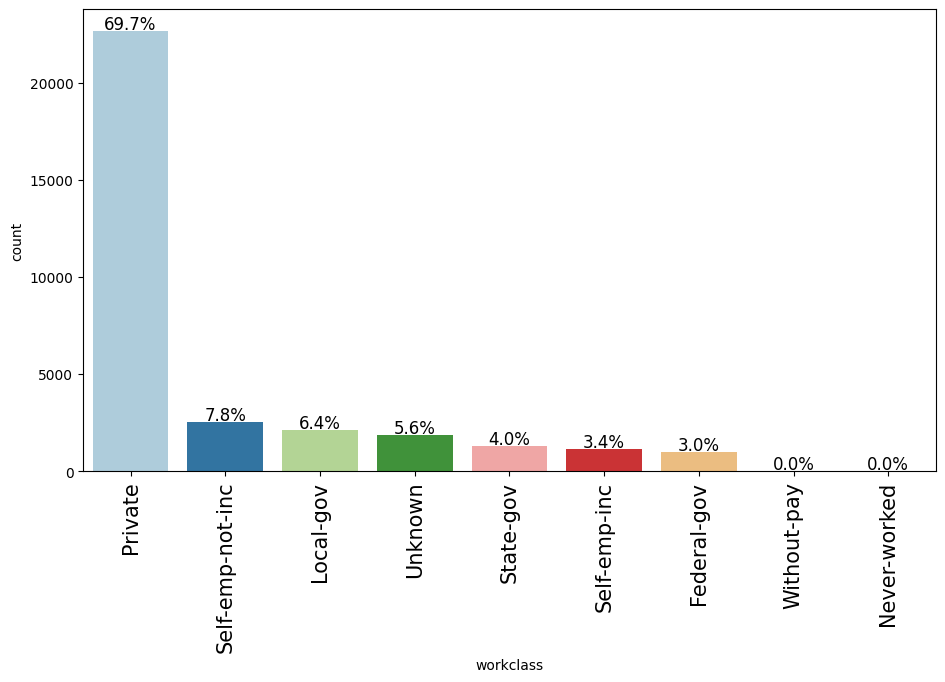

In [113]:
# Observations on workclass

labeled_barplot(df, "workclass", perc = True)

~70% of the observations are from the Private sector working class.

As expected from the number of hours per week.

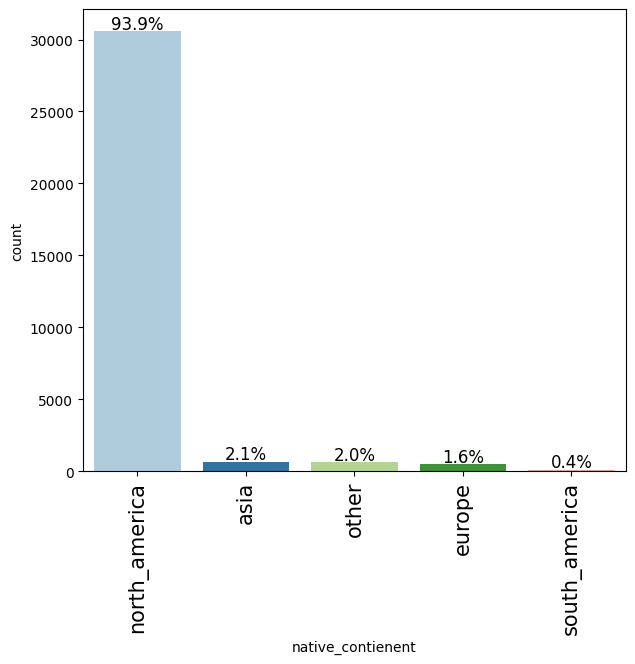

In [114]:
# Observations on Native_Country

labeled_barplot(df, "native_contienent", perc=True)

94% of the people are native to north_america followed by 2.1% Asians.

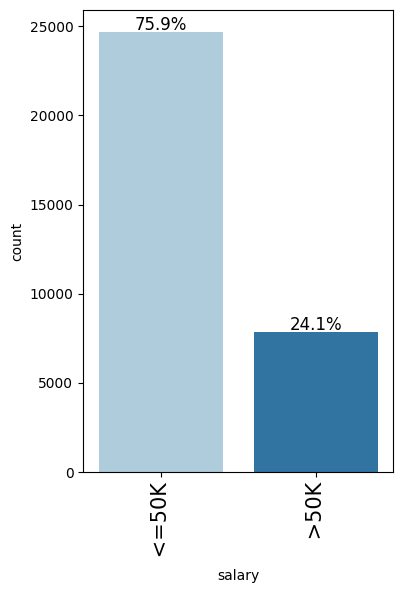

In [115]:
# Observations on salary

labeled_barplot(df, "salary", perc=True)

~24% of the observations have a salary above 50K and while ~76% have a salary below 50K


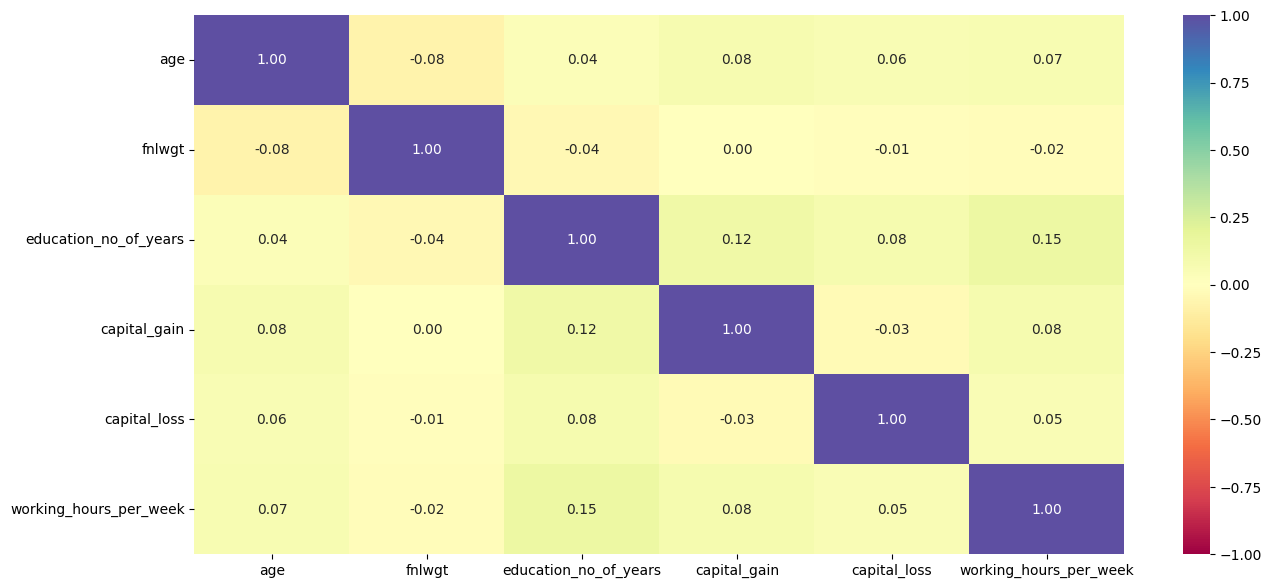

In [116]:
# Bivariate Analysis

# Correlation check

plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

There is no significant correlation between the columns.

salary   <=50K   >50K    All
sex                         
All      24692   7839  32531
Male     15113   6660  21773
Female    9579   1179  10758
------------------------------------------------------------------------------------------------------------------------


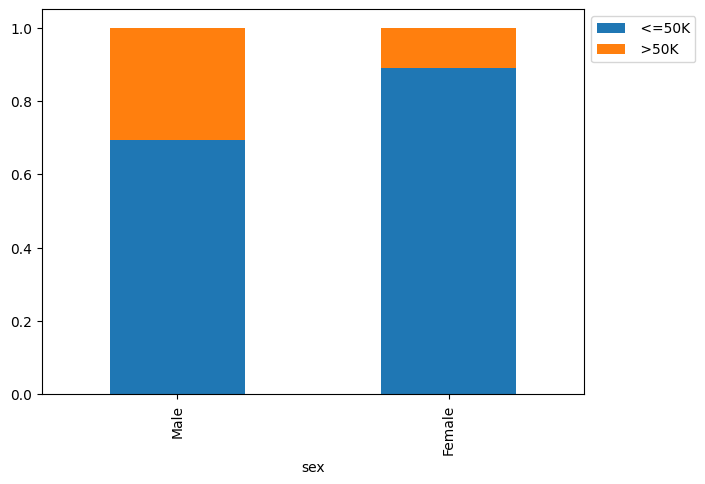

In [117]:
# Salary vs Sex

stacked_barplot(df, "sex", "salary")

~30% of the males have salary >50K whereas only ~10% of the females have salary >50K.

This shows the pay gap that exists in society and the government should investigate further on it to formulate policy to ensure equal pay.

salary         <=50K   >50K    All
education                         
All            24692   7839  32531
Bachelors       3132   2221   5353
HS-grad         8816   1674  10490
Some-college    5894   1386   7280
Masters          763    959   1722
Prof-school      153    423    576
Assoc-voc       1021    361   1382
Doctorate        107    306    413
Assoc-acdm       802    265   1067
10th             871     62    933
11th            1115     60   1175
7th-8th          605     40    645
12th             400     33    433
9th              487     27    514
5th-6th          316     16    332
1st-4th          160      6    166
Preschool         50      0     50
------------------------------------------------------------------------------------------------------------------------


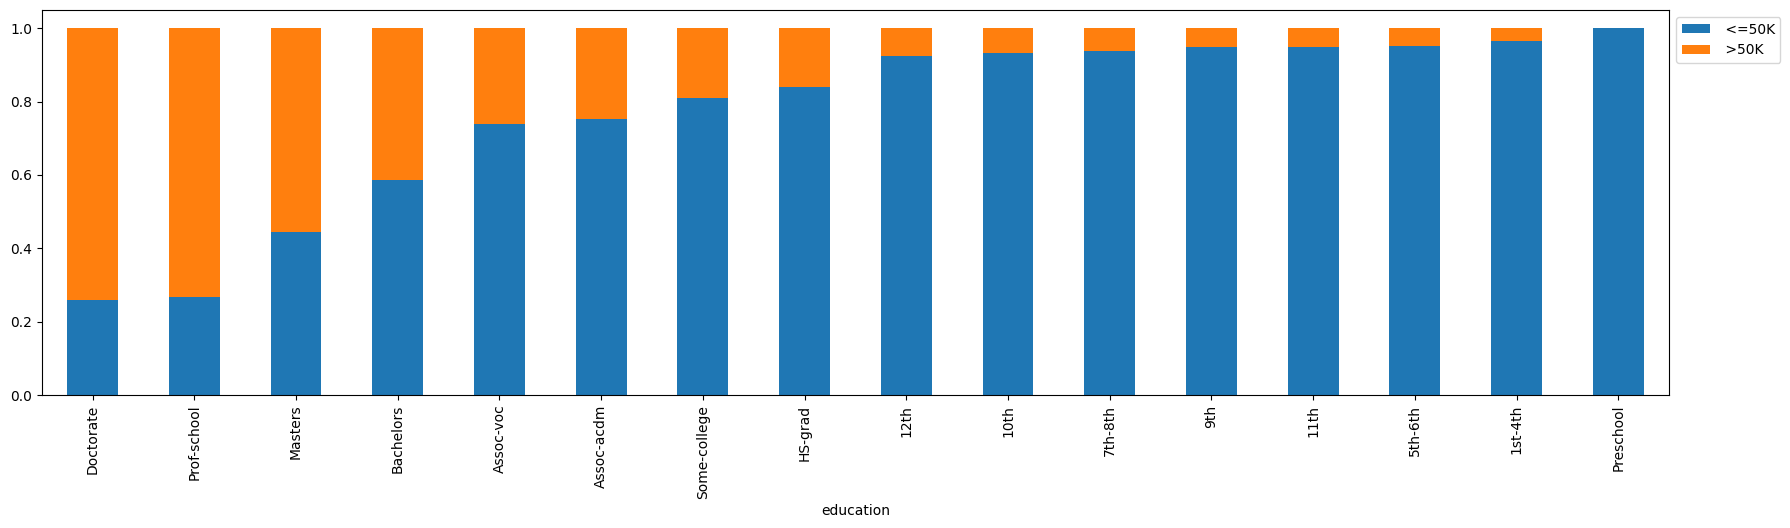

In [118]:
# Salary vs Education
stacked_barplot(df, "education", "salary")

~70% of the people of are Doctorate, graduate from Professional school program (Prof-school) have a salary above $50K.


This clearly shows a positive relationship between education and salary, the higher the education higher is the salary.

salary              <=50K   >50K    All
occupation                             
All                 24692   7839  32531
Exec-managerial      2097   1968   4065
Prof-specialty       2278   1858   4136
Sales                2666    983   3649
Craft-repair         3164    929   4093
Adm-clerical         3259    507   3766
Transport-moving     1277    320   1597
Tech-support          644    283    927
Machine-op-inspct    1750    249   1999
Protective-serv       438    211    649
Unknown              1652    191   1843
Other-service        3153    137   3290
Farming-fishing       877    115    992
Handlers-cleaners    1283     86   1369
Armed-Forces            8      1      9
Priv-house-serv       146      1    147
------------------------------------------------------------------------------------------------------------------------


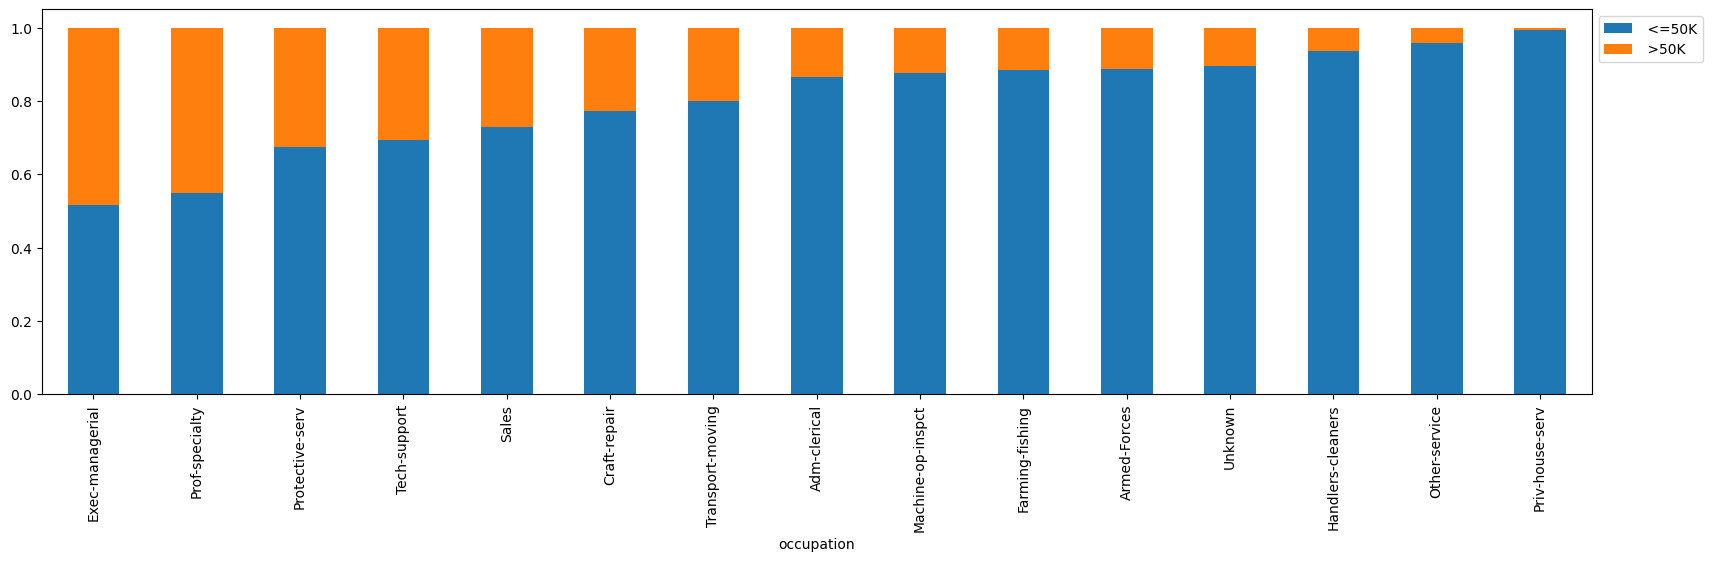

In [119]:
# Salary Vs Occupation

stacked_barplot(df, "occupation", "salary")

~50% of the people whose occupation is of Executive Manager, Professor-speciality have a salary above $50,000

People with occupations like Private house service,handlers-cleaners, farming-fishing have a higher likelihood of having below 50K salary.

salary             <=50K   >50K    All
workclass                             
All                24692   7839  32531
Private            17706   4961  22667
Self-emp-not-inc    1816    724   2540
Self-emp-inc         494    622   1116
Local-gov           1476    617   2093
Federal-gov          589    371    960
State-gov            945    353   1298
Unknown             1645    191   1836
Never-worked           7      0      7
Without-pay           14      0     14
------------------------------------------------------------------------------------------------------------------------


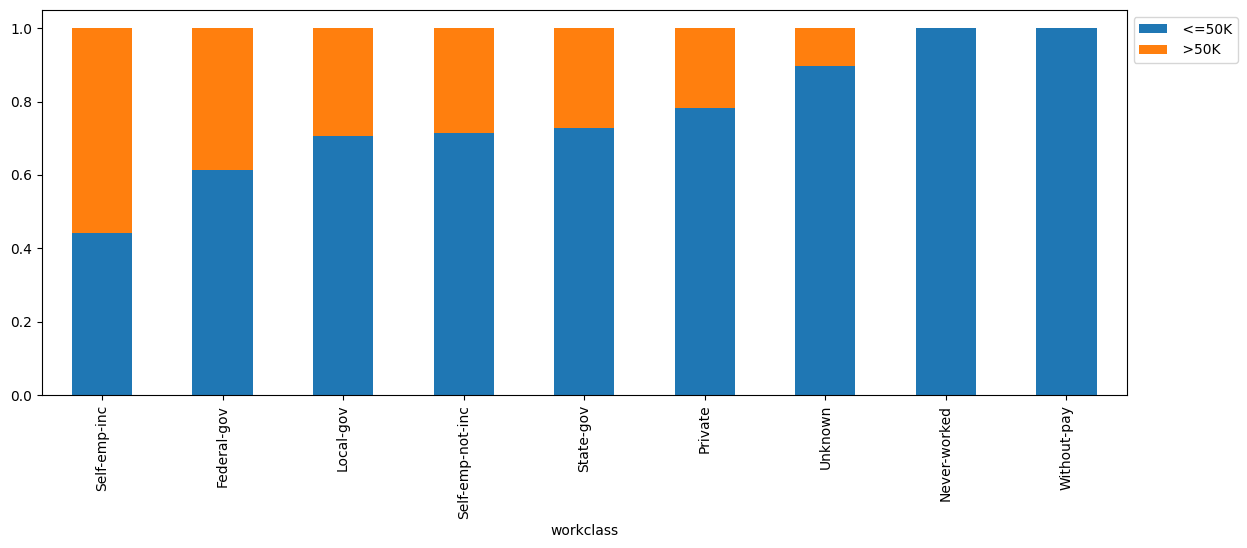

In [120]:
#Salary vs Workclass
stacked_barplot(df, "workclass", "salary")

~50% of the self-employed people have a salary above 50K followed by ~40% of the federal govt employee who has salary more than 50K.

~20% of the people working in the private sector earn more than 50K.

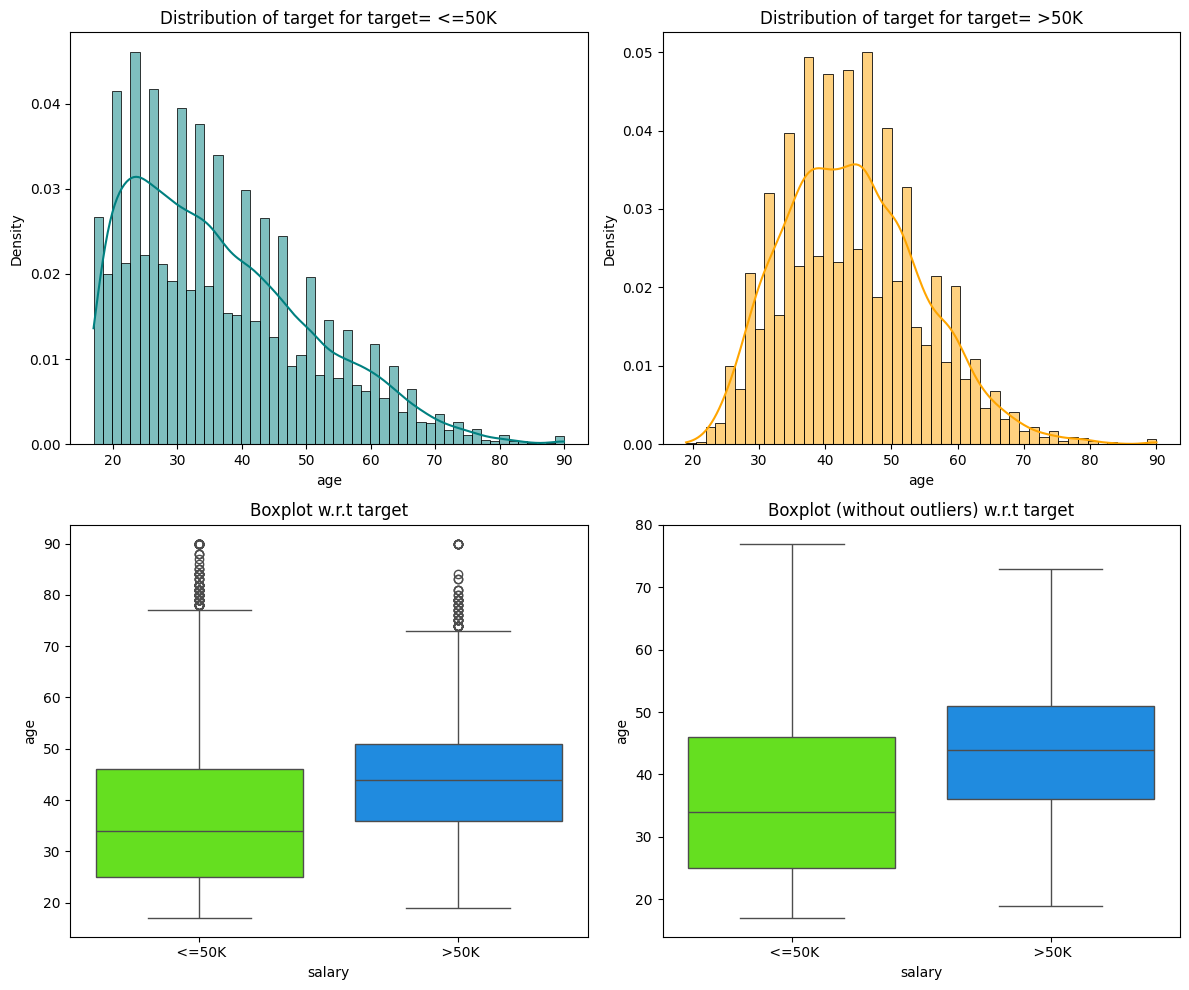

In [121]:
# Salary Vs Age

distribution_plot_wrt_target(df, "age", "salary")

People who more than 50K salary are generally older having an average age of around 48 years.

People who have less than 50K salary have an average age of around 36.

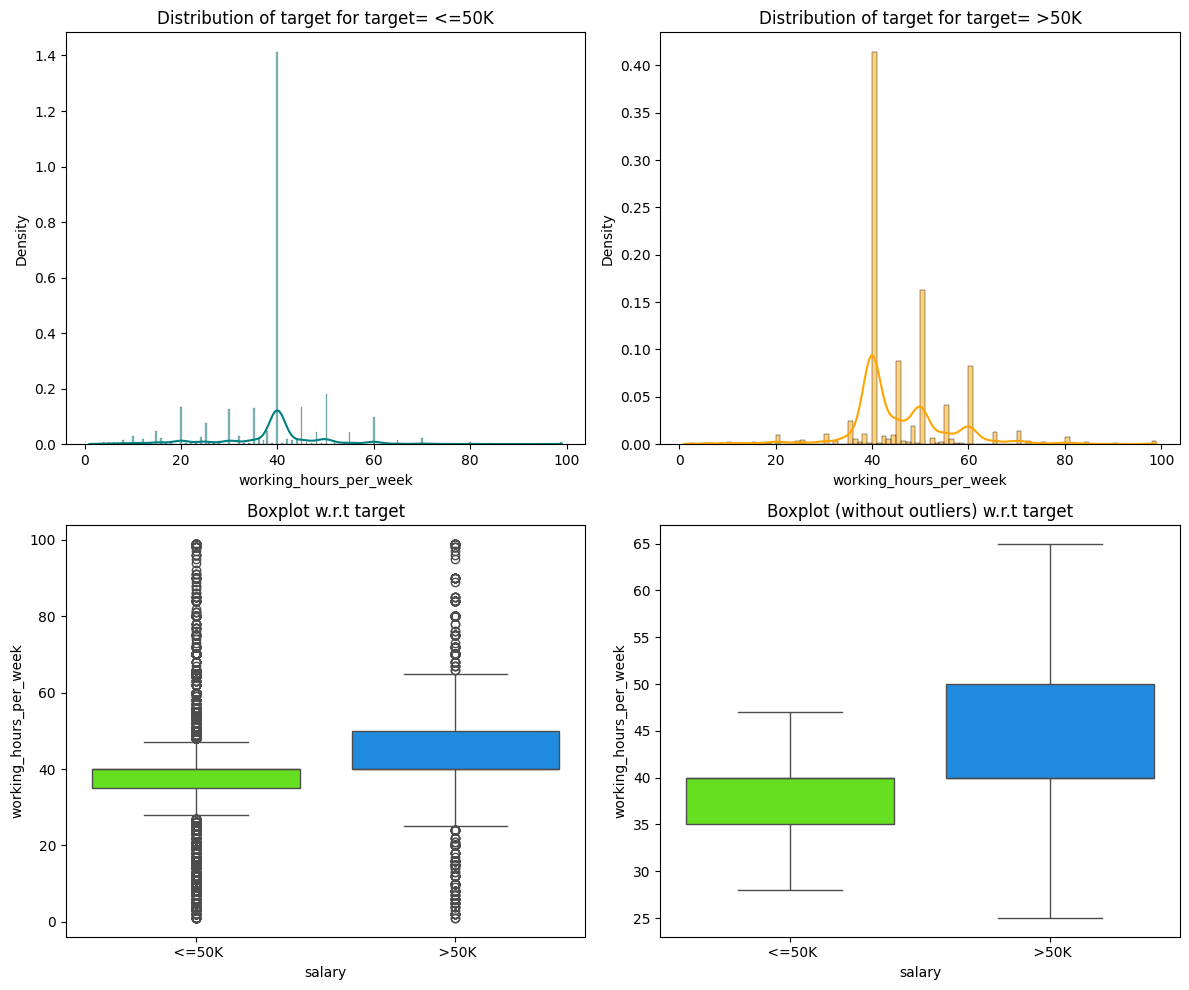

In [122]:
# salary vs working_hours_per_week
distribution_plot_wrt_target(df, "working_hours_per_week", "salary")

Majority of people having above 50K salary work around 40 hours per week.

Those having >50K salary have a higher range of working hours as compared to the ones with <=50K, but there are outliers present.

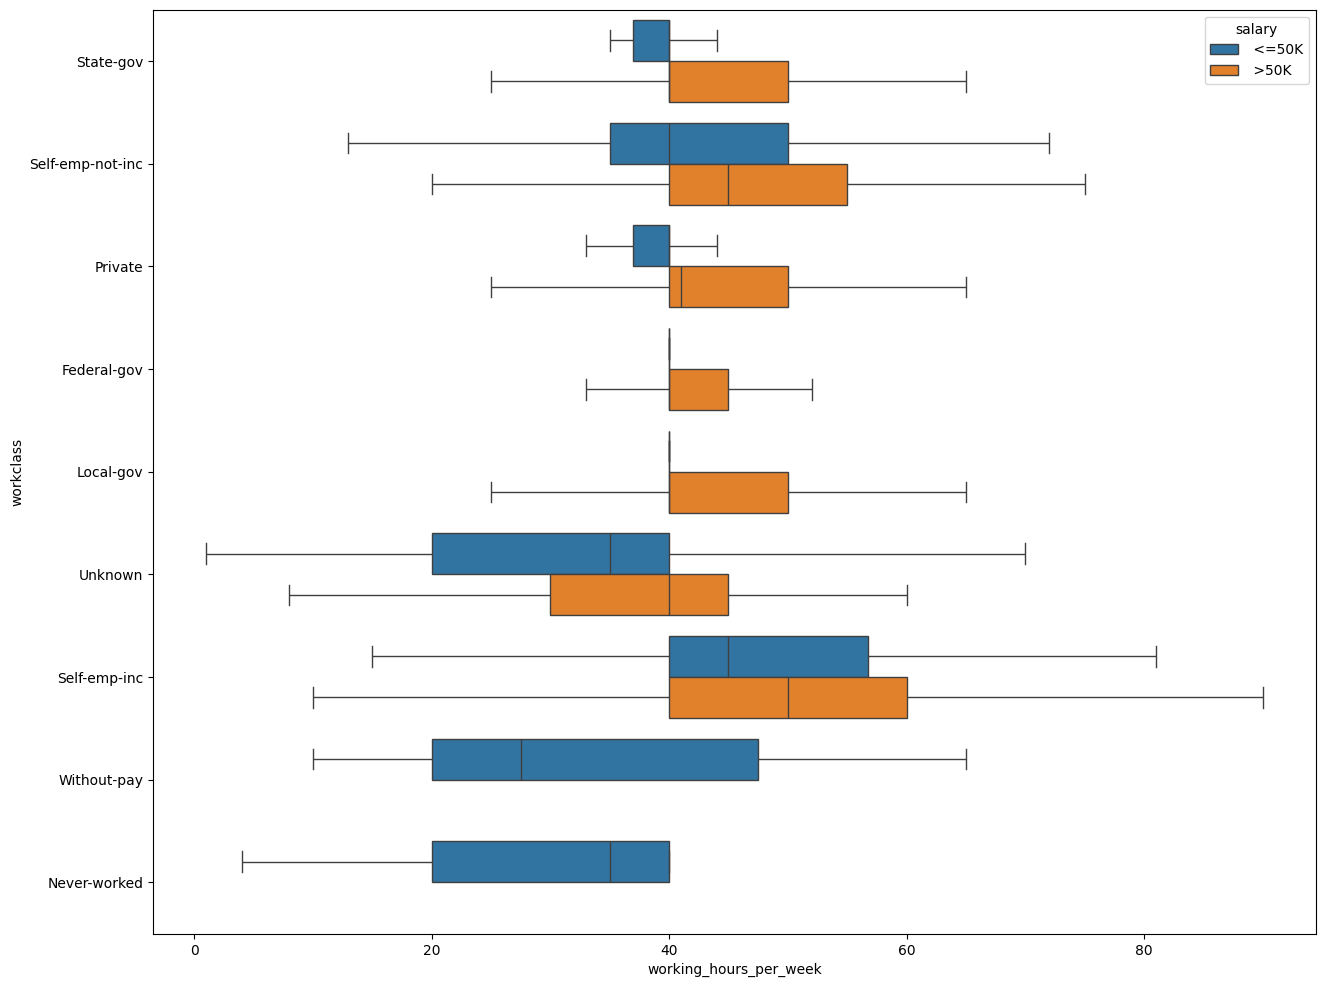

In [123]:
# lets see how working hours per week vary across different occupation
plt.figure(figsize=(15, 12))
sns.boxplot(
    y="workclass", x="working_hours_per_week", data=df, hue="salary", showfliers=False
)
plt.show()

Private sector employees work for more hours to get a salary above 50K.

There's large variability in the working hours of self-employed people which makes sense as they might be working at their ease.

Without pay and never worked will have no income or less than 50K income.

The number of working hours for many government employees is concentrated at 40 hrs a week, which makes sense as government employees generally have fixed working hours.

Actions for data pre-processing:

Many variables have outliers that need to be treated.
We can drop capital_gain and capital_loss as most of the observations are 0 in these variables, and if the government already knows a person's capital gain or loss it will be easier for them to classify a person into a salary group.


Data Preprocessing:

We can drop capital_gain and capital_loss as most of the observations are 0 in these variables, and if the government already knows a person's capital gain or loss it will be easier for them to classify a person into a salary group

There are many outliers in the data which we will treat (perform capping of outliers)

All the values smaller than the lower whisker will be assigned the value of the lower whisker, and all the values above the upper whisker will be assigned the value of the upper whisker.

In [124]:
# Dropping capital_gain and capital_loss
data.drop(["capital_gain", "capital_loss"], axis = 1, inplace = True)

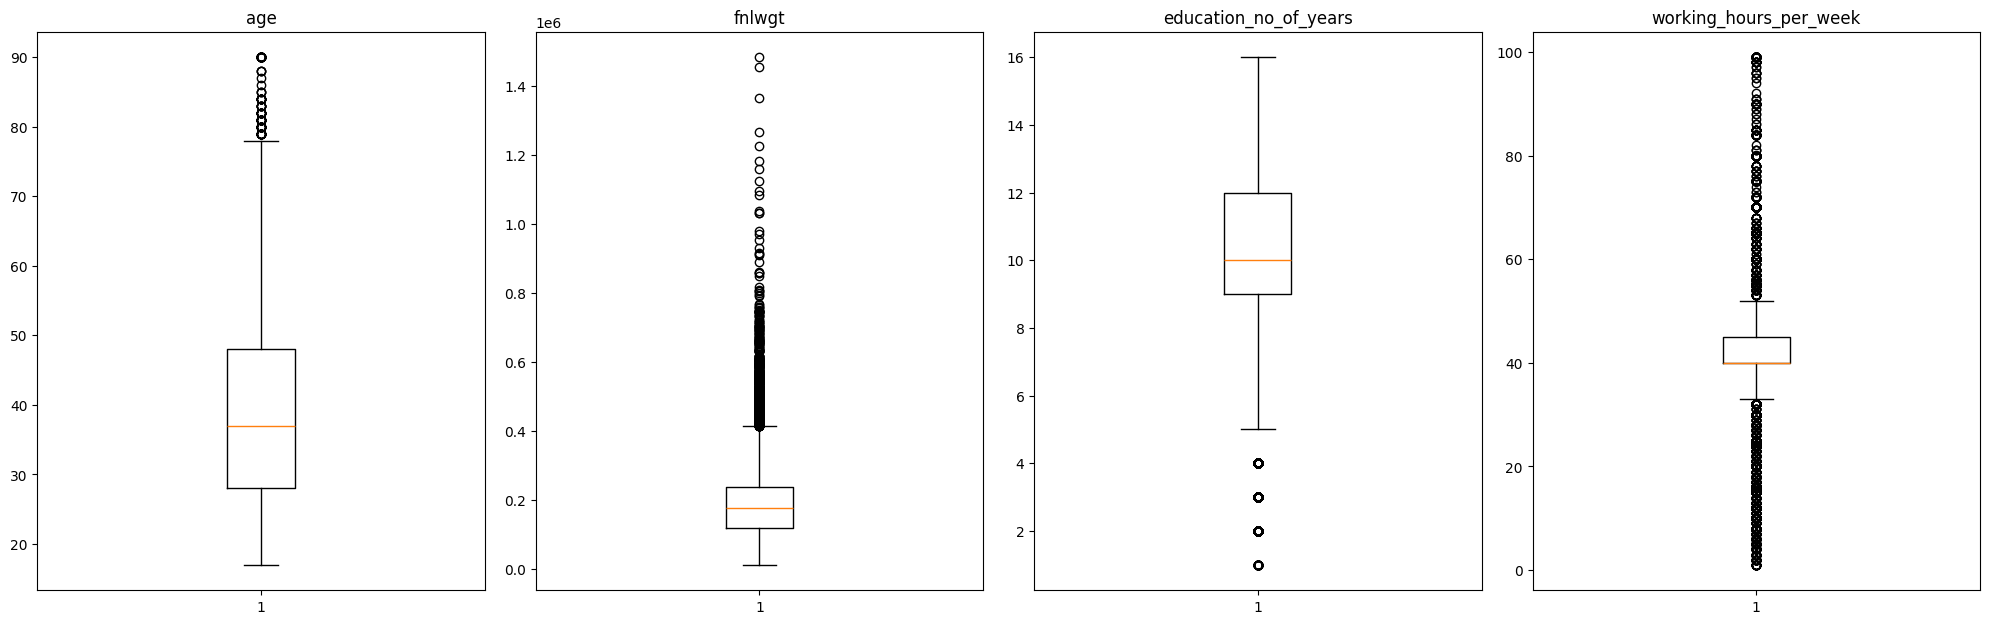

In [125]:
# Outliner Detection
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Age and fnlwgt have upper outliers.

education_no_years has lower outliers.

working_hours_per_week has both upper and lower outliers.

In [126]:
# Outliner Treatment

# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [127]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
data = treat_outliers_all(data, numerical_col)

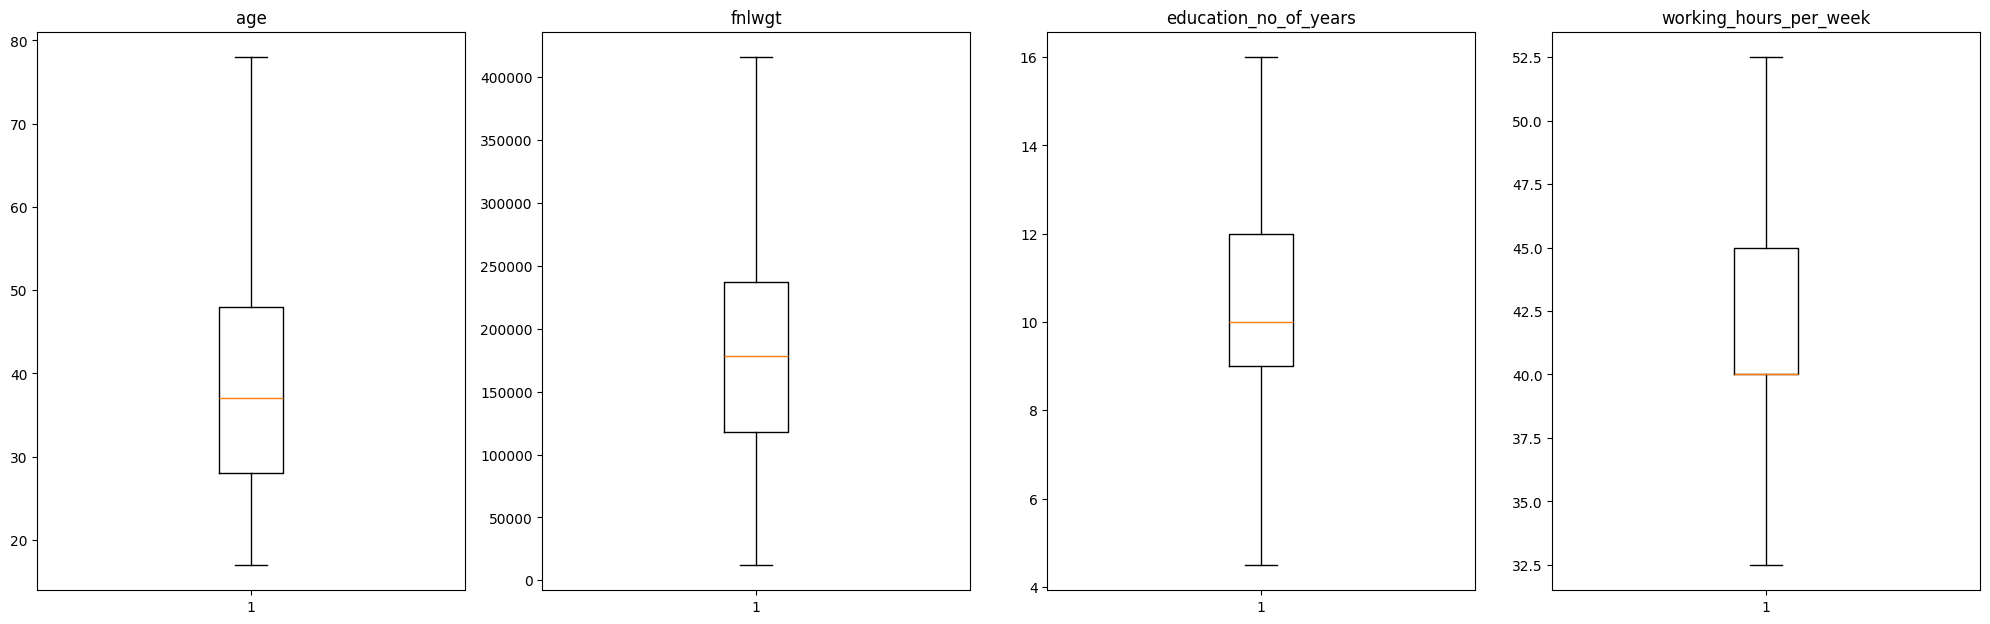

In [128]:
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [129]:
#Data Preparation for Modeling
#Encoding >50K as 0 and <=50K as 1 as government wants to find underprivileged section of society.

data["salary"] = data["salary"].apply(lambda x: 1 if x == " <=50K" else 0)

In [130]:
#Creating training and test sets

# specifying the independent  and dependent variables
X = data.drop(["salary"], axis=1)
Y = data["salary"]

# adding a constant to the independent variables
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

#Converting values to float
X = X.astype(float)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [131]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (22771, 53)
Shape of test set :  (9760, 53)
Percentage of classes in training set:
salary
1    0.758026
0    0.241974
Name: proportion, dtype: float64
Percentage of classes in test set:
salary
1    0.761373
0    0.238627
Name: proportion, dtype: float64


Model Building - Logistic Regression

We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

In [132]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                 salary   No. Observations:                22771
Model:                          Logit   Df Residuals:                    22720
Method:                           MLE   Df Model:                           50
Date:                Fri, 20 Jun 2025   Pseudo R-squ.:                  0.3678
Time:                        18:29:27   Log-Likelihood:                -7965.8
converged:                      False   LL-Null:                       -12600.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               9.5200   5.62e+05   1.69e-05      1.000    -1.1e+06     1.1e+06
age                                -0.0314      0.002    -17.126    

Observations

Negative values of the coefficient show that the probability of a person having a salary less than 50K decreases with the increase of the corresponding attribute value.

Positive values of the coefficient show that the probability of a person having a salary less than 50K increases with the increase of the corresponding attribute value.

p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

**Model Performance Evaluation**

Model can make wrong predictions as:

Predicting a person has a salary <=50K but in reality the salary of the person is >50K.

Predicting a person doesn't have a salary <=50K but in reality the salary of the person is <=50k.

**Which case is more important?**

Both the cases are important as:

If we predict a person has a salary <=50K but actually the salary is >50K then a wrong person will be getting the benefits of the scheme and government might lose resources.

If we predict a person doesn't have a salary <=50K but actually the salary is <=50K that person will not be able to avail the benefits of the scheme constituting to opportunity loss.

**How to reduce this loss?**

We need to reduce both False Negatives and False Positives

f1_score should be maximized as the greater the f1_score, the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly

fi_score is computed as

f1_score=2∗Precision∗Recall / Precision+Recall

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

The model_performance_classification_statsmodels function will be used to check the model performance of models.
The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [133]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [134]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

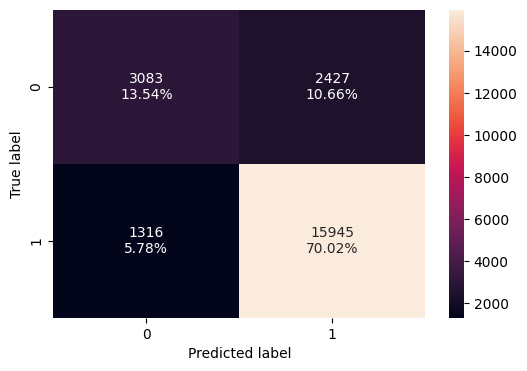

In [135]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [136]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.835624,0.923759,0.867897,0.894957


**Observations**

The f1_score of the model is ~0.89 and we will try to maximize it further

The variables used to build the model might contain multicollinearity, which will affect the p-values

We will have to remove multicollinearity from the data to get reliable coefficients and p-values

**Detecting and Dealing with Multicollinearity**

There are different ways of detecting (or testing for) multicollinearity. One such way is using the Variation Inflation Factor (VIF).

**Variance Inflation factor:**

Variance inflation factors measure the inflation in the variances of the regression coefficients estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient βk  is "inflated" by the existence of correlation among the predictor variables in the model.

**General Rule of thumb:**

If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and hence the variance of βk  is not inflated at all.

If VIF exceeds 5, we say there is moderate multicollinearity

If VIF is equal or exceeding 10, it shows signs of high multi-collinearity

The purpose of the analysis should dictate which threshold to use

In [137]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                               0.000000
age                                 1.531401
fnlwgt                              1.037491
education_no_of_years                    inf
working_hours_per_week              1.237162
workclass_Local-gov                 3.041470
workclass_Never-worked                   inf
workclass_Private                   7.717533
workclass_Self-emp-inc              2.217152
workclass_Self-emp-not-inc          3.487046
workclass_State-gov                 2.317984
workclass_Unknown                        inf
workclass_Without-pay               1.015562
education_11th                           inf
education_12th                           inf
education_1st-4th                        inf
education_5th-6th                        inf
education_7th-8th                        inf
education_9th                            inf
education_Assoc-acdm                     inf
education_Assoc-voc                      inf
education_Bachelors 

education_no_of_years, education, and some categorical levels of workclass, native_country, and race exhibit high multicollinearity

We see that some variables have inf values for VIF

The inf values for VIF indicate perfect correlation between variables
As we saw in our earlier analysis that wherever workclass has unknown values occupation is also unknown.

The high correlation between these variables has been highlighted in the VIF values as well
We will drop occupation_Unknown as we get the same information from workclass_Unknown

In [138]:
#Removing occupation_Unknown

X_train1 = X_train.drop("occupation_Unknown", axis=1)

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                               0.000000
age                                 1.531401
fnlwgt                              1.037491
education_no_of_years                    inf
working_hours_per_week              1.237162
workclass_Local-gov                 3.041470
workclass_Never-worked              1.012785
workclass_Private                   7.717533
workclass_Self-emp-inc              2.217152
workclass_Self-emp-not-inc          3.487046
workclass_State-gov                 2.317984
workclass_Unknown                   3.039325
workclass_Without-pay               1.015562
education_11th                           inf
education_12th                           inf
education_1st-4th                        inf
education_5th-6th                        inf
education_7th-8th                        inf
education_9th                            inf
education_Assoc-acdm                     inf
education_Assoc-voc                      inf
education_Bachelors 

education_no_of_years and education also capture similar information and hence, it is understandable that they have high VIF values

We will be dropping education_no_of_years and education one at a time, building separate models, and checking their performances to see which variable has a significant impact on the model's performance

In [139]:
#Dropping education_no_of_years

X_train2 = X_train1.drop("education_no_of_years", axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series3))

Series before feature selection: 

const                              326.271888
age                                  1.531401
fnlwgt                               1.037491
working_hours_per_week               1.237162
workclass_Local-gov                  3.041470
workclass_Never-worked               1.012785
workclass_Private                    7.717533
workclass_Self-emp-inc               2.217152
workclass_Self-emp-not-inc           3.487046
workclass_State-gov                  2.317984
workclass_Unknown                    3.039325
workclass_Without-pay                1.015562
education_11th                       2.147415
education_12th                       1.422410
education_1st-4th                    1.188352
education_5th-6th                    1.338683
education_7th-8th                    1.655272
education_9th                        1.524978
education_Assoc-acdm                 2.105382
education_Assoc-voc                  2.374490
education_Bachelors                  5.939193

Dropping education_no_of_years fixes the multicollinearity in education column.

In [140]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)

print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train2, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.835624,0.923759,0.867897,0.894957


No significant change in the model performance.

**Observations:**

Dropping education_no_of_years, race_ White doesn't have a significant impact on the model performance.

We can choose any model to proceed to the next steps.

Some of the categorical levels of a variable have VIF>5 which can simply be ignored.

In [141]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:                 salary   No. Observations:                22771
Model:                          Logit   Df Residuals:                    22720
Method:                           MLE   Df Model:                           50
Date:                Fri, 20 Jun 2025   Pseudo R-squ.:                  0.3678
Time:                        18:29:55   Log-Likelihood:                -7965.8
converged:                      False   LL-Null:                       -12600.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               8.3433      0.405     20.584      0.000       7.549       9.138
age                                -0.0314      0.002    -17.126    

**Removing high p-value variables**

For other attributes present in the data, the p-values are high only for few dummy variables and since only one (or some) of the categorical levels have a high p-value we will drop them iteratively as sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.

Instead, we will do the following repeatedly using a loop:

Build a model, check the p-values of the variables, and drop the column with the highest p-value.

Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.

Repeat the above two steps till there are no columns with p-value > 0.05.

Note: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [142]:
# initial list of columns
cols = X_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train2[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'age', 'fnlwgt', 'working_hours_per_week', 'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Unknown', 'education_1st-4th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Prof-school', 'education_Some-college', 'marital_status_married', 'marital_status_not_married', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'race_Other', 'race_White', 'native_contienent_other', 'native_contienent_south_america']


In [143]:
X_train3 = X_train2[selected_features]

In [144]:
logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit(disp=False)

print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:                 salary   No. Observations:                22771
Model:                          Logit   Df Residuals:                    22735
Method:                           MLE   Df Model:                           35
Date:                Fri, 20 Jun 2025   Pseudo R-squ.:                  0.3666
Time:                        18:30:04   Log-Likelihood:                -7980.7
converged:                       True   LL-Null:                       -12600.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               8.0557      0.233     34.544      0.000       7.599       8.513
age                                -0.0314      0.002    -17.178    

**Now no categorical feature has p-value greater than 0.05, so we'll consider the features in X_train3 as the final ones and lg3 as final model.**

**Coefficient Interpretations**

Coefficient of some levels of education, workclass, and native country are positive an increase in these will lead to increase in chances of a person having <=50K salary.

Coefficient of age, fnlwgt, marital_status, working_hours_per_week, some levels of education, workclass, and native country are negative increase in these will lead to decrease in chances of a person having <=50K salary.

**Converting coefficients to odds**

The coefficients (βs) of the logistic regression model are in terms of log(odds)
and to find the odds, we have to take the exponential of the coefficients
Therefore, odds=exp(β)

The percentage change in odds is given as (exp(β)−1)∗100


In [145]:
# converting coefficients to odds
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train3.columns).T

,const,age,fnlwgt,working_hours_per_week,workclass_Local-gov,workclass_Private,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Unknown,education_1st-4th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Prof-school,education_Some-college,marital_status_married,marital_status_not_married,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,race_Other,race_White,native_contienent_other,native_contienent_south_america
Odds,3151.769230,0.969130,0.999999,0.937106,1.840620,1.431156,2.228214,2.180033,2.968489,4.947805,1.852163,1.809587,0.277548,0.254854,0.137414,0.054548,0.458036,0.092492,0.043336,0.341689,0.075834,0.674683,0.489944,2.887110,2.215304,1.468939,2.656708,11.291126,0.620316,0.577698,0.855304,0.532832,1.976960,0.856834,1.573320,3.524735
Change_odd%,315076.922967,-3.086978,-0.000063,-6.289395,84.062005,43.115618,122.821364,118.003275,196.848948,394.780514,85.216306,80.958691,-72.245187,-74.514571,-86.258563,-94.545220,-54.196379,-90.750752,-95.666411,-65.831123,-92.416624,-32.531684,-51.005637,188.710981,121.530367,46.893899,165.670835,1029.112563,-37.968373,-42.230185,-14.469579,-46.716755,97.696049,-14.316591,57.332018,252.473541


**Coefficient interpretations**

age: Holding all other features constant a 1 unit change in Age will decrease the odds of a person having salary <=50k by ~0.97 times or a ~3% decrease in odds of having salary <=50K.

working_hours_per_week: Holding all other features constant a 1 unit change in the working_hours_per_week will decrease the odds of a person having salary <=50k by ~0.94 times or a decrease of ~6.3% decrease in odds of having salary <=50K.

marital_status: The odds of a person whose marital status is married having a salary <=50K is ~0.076 less than the person who was never married or ~92.4% fewer odds of having salary <=50K than the person who was never married. Similarly, the odds of a person whose marital status is not_married having a salary <=50K is ~0.67 times less than the person who was never married or ~32.5% less odds of having a salary <=50K than the person who was never married. [the dropped category Never_married is taken as a reference level]

education: The odds of a person who is HS-grad having salary <=50K is ~0.45 times less than the person who has done education 1st-9th, 11th or Preschool or ~54.1% fewer odds of having salary <=50K. Similarly, The odds of a person who has a Doctorate having a salary <=50K is 0.05 times less than the person who has done education 1st-9th or Preschool or ~95.00% less odds of having a salary <=50K. [the dropped categories education_ 1st-4th,education_ 5th-6th, education_ 7th-8th, education_ 9th, education_ 11th, education_ Preschool are taken as a reference level]

**Interpretation for other attributes can be done similarly.**

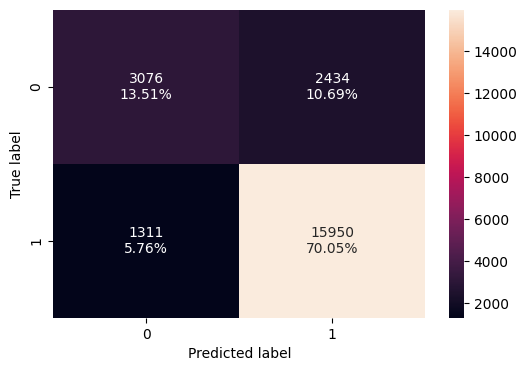

In [146]:
#Checking performance of the new model

# Training set performance

# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train3, y_train)

In [147]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg3, X_train3, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.835536,0.924048,0.867602,0.894936


Test set performance

We have to first drop the columns from the test set that were dropped from the training set.

In [148]:
X_test3 = X_test[list(X_train3.columns)]

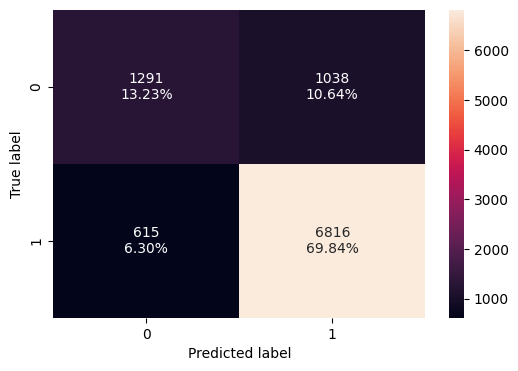

In [149]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test)

In [150]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg3, X_test3, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.830635,0.917239,0.867838,0.891855


The model is giving a good f1_score of ~0.895 and ~0.892 on the train and test sets respectively

As the train and test performances are comparable, the model is not overfitting

Moving forward we will try to improve the performance of the model

**Model Performance Improvement**
Let's see if the f1_score can be improved further by changing the model threshold

First, we will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold

Next, we will check the Precision-Recall curve to find the right balance between precision and recall as our metric of choice is f1_score

**ROC Curve and ROC-AUC**

ROC-AUC on training set

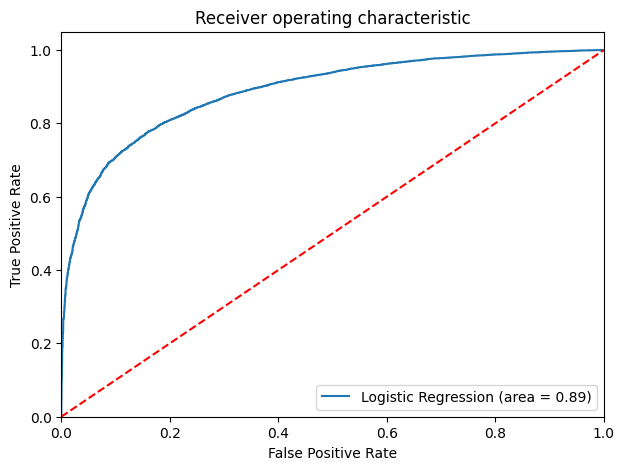

In [151]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Logistic Regression model is giving a good performance on training set.

In [152]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.7579399407330089


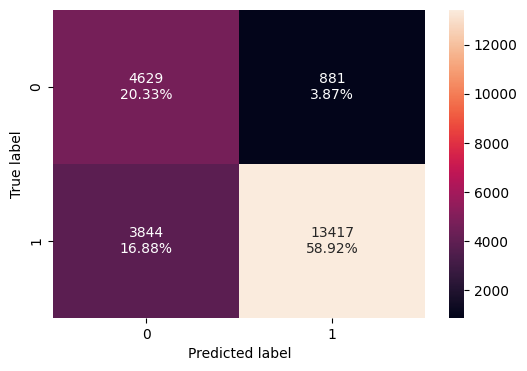

In [153]:
# Checking model performance on training set
# creating confusion matrix
confusion_matrix_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_auc_roc
)

In [154]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.792499,0.777301,0.938383,0.85028


Precision of model has increased but the other metrics have reduced.

The model is still giving a good performance.

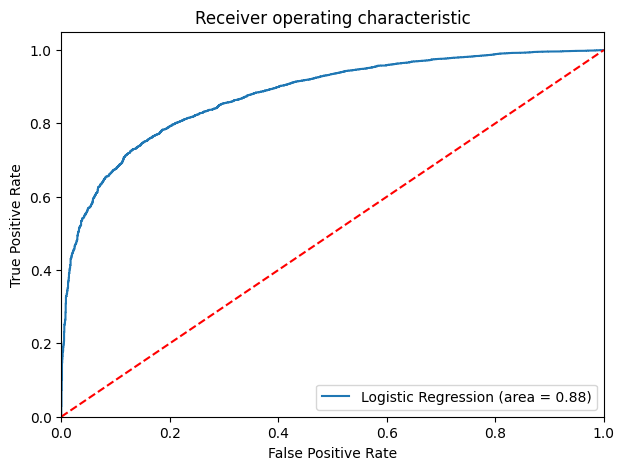

In [155]:
#Checking model performance on test set

logit_roc_auc_train = roc_auc_score(y_test, lg3.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

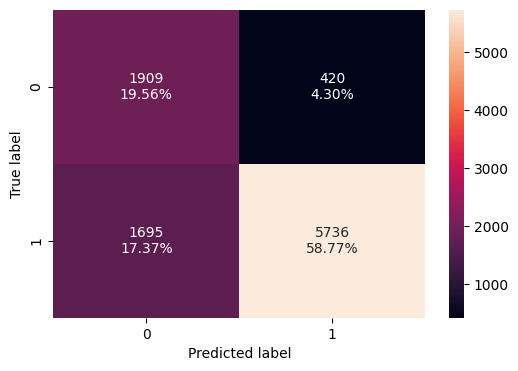

In [156]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test, threshold=optimal_threshold_auc_roc)

In [157]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_test3, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.783299,0.771901,0.931774,0.844336


**Precision - Recall Curve**

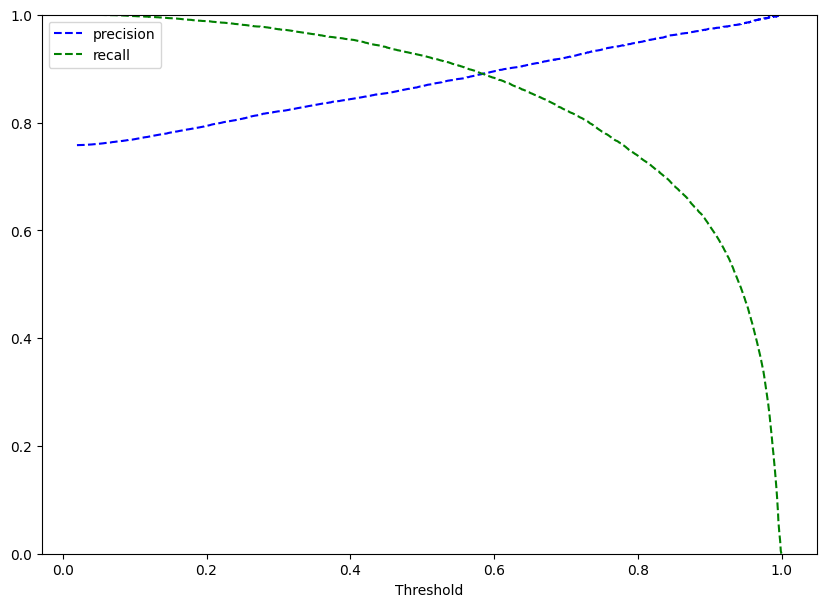

In [158]:
y_scores = lg3.predict(X_train3)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

At the threshold of 0.58, we get balanced recall and precision.

In [159]:
# setting the threshold
optimal_threshold_curve = 0.58

**Checking model performance on training set**

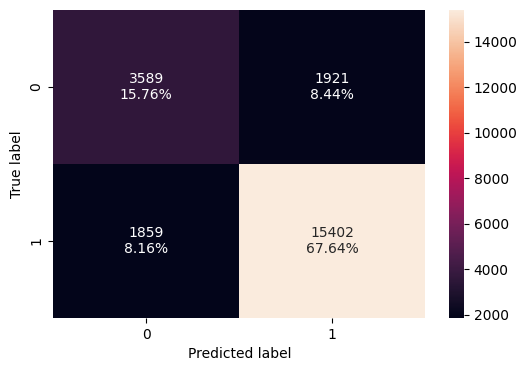

In [160]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train3, y_train, threshold=optimal_threshold_curve)

In [161]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.833999,0.892301,0.889107,0.890701


Model is performing well on training set.

There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.58 as the optimal threshold.

**Checking model performance on test set**

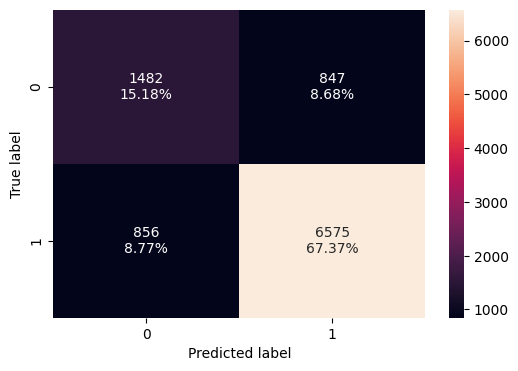

In [162]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test, threshold=optimal_threshold_curve)

In [163]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_test3, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.825512,0.884807,0.88588,0.885343


**Model Performance Comparison and Final Model Selection**

In [164]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.76 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.76 Threshold,Logistic Regression-0.58 Threshold
Accuracy,0.835536,0.792499,0.833999
Recall,0.924048,0.777301,0.892301
Precision,0.867602,0.938383,0.889107
F1,0.894936,0.850280,0.890701


In [165]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.76 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.76 Threshold,Logistic Regression-0.58 Threshold
Accuracy,0.830635,0.783299,0.825512
Recall,0.917239,0.771901,0.884807
Precision,0.867838,0.931774,0.885880
F1,0.891855,0.844336,0.885343


Almost all the three models are performing well on both training and test data without the problem of overfitting

The model with a default threshold (0.5) is giving the best F1 score. Therefore it can be selected as the final model

**Conclusions and Recommendations**

We have been able to build a predictive model that can be used by the government to find the citizens having less than 50K salary with an f1_score of 0.89 on the training set and formulate policies accordingly.

All the logistic regression models have given a generalized performance on the training and test set.

Coefficient of some levels of education, workclass, and native country are positive an increase in these will lead to increase in chances of a person having <=50K salary.

Coefficient of age, fnlwgt, marital_status, working_hours_per_week,some levels of education, workclass, and native country are negative increase in these will lead to decrease in chances of a person having <=50K salary.

The government should promote education among citizens, they should make policies to make education accessible to all, as we say in our analysis that people who have higher education are more likely to have a salary above 50,000 Dollars.

Working hours is one of the significant predictors of salary, The government should implement laws to ensure that people are paid fairly for their work and are not overworked for the increase in salaries. This would improve work-life balance.

Reforms should be made for private-sector employees so that they are paid fairly for their work.

Policy formulated by the government should be considerate of equal pay and counter the pay gap that exists in society.